In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# !kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python
# !unzip /content/customer-segmentation-tutorial-in-python.zip

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/customer-segmentation-tutorial-in-python.zip
replace Mall_Customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mall_Customers.csv      


In [3]:
df = pd.read_csv("/content/customer-segmentation-tutorial-in-python.zip")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
duplicates = df['CustomerID'].duplicated(keep=False)

print(df[duplicates])

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [7]:
data_cleaned = df.drop(columns=['CustomerID'])

data_cleaned.columns = data_cleaned.columns.str.replace(' ', '_').str.lower()

data_cleaned

,gender,age,annual_income_(k$),spending_score_(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Univariate Analysis

In [8]:
data_cleaned.describe()

,age,annual_income_(k$),spending_score_(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


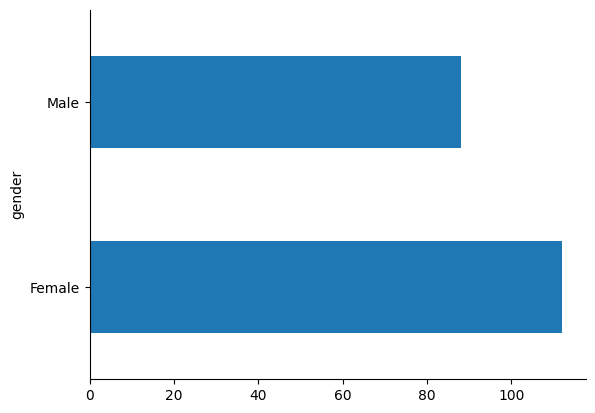

In [9]:
data_cleaned.groupby('gender').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

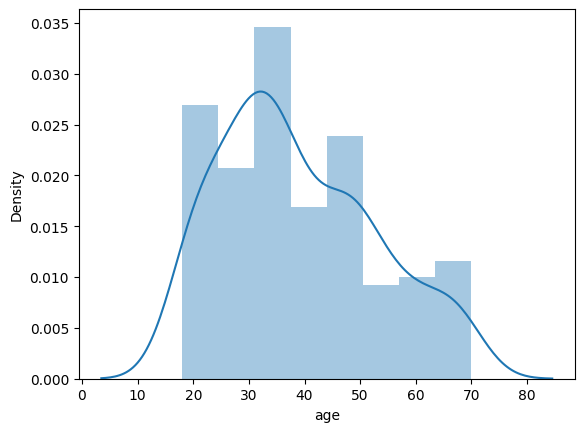

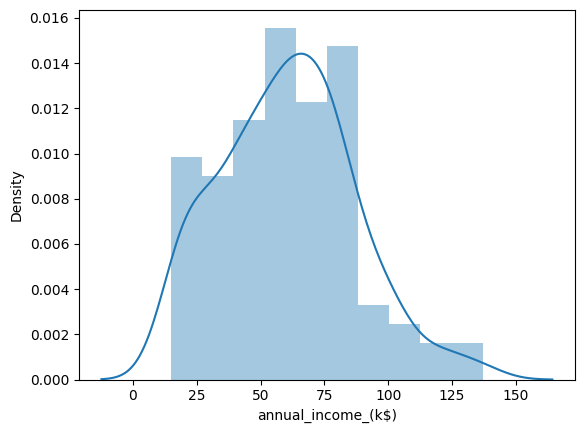

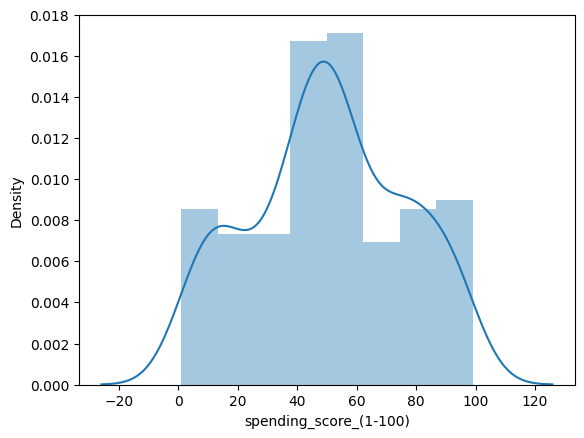

In [10]:
cols = ['age', 'annual_income_(k$)','spending_score_(1-100)']
for i in cols:
    sns.distplot(data_cleaned[i])
    plt.show()

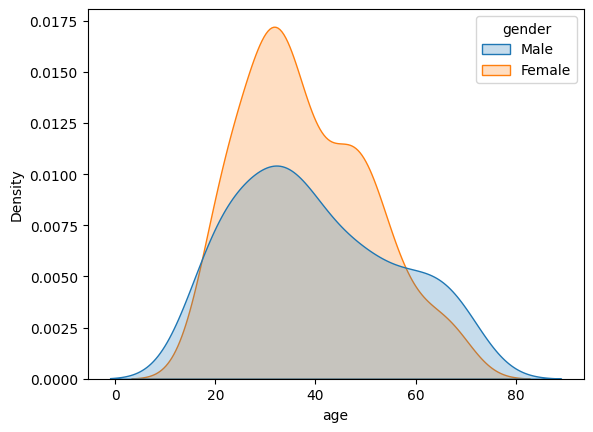

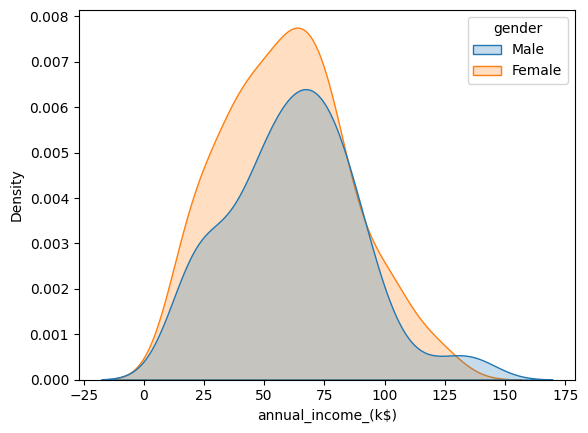

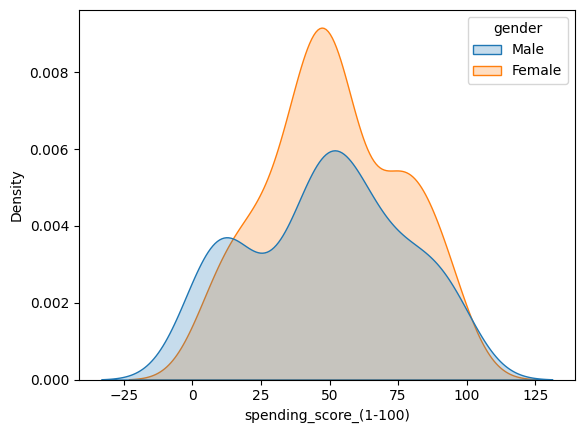

In [11]:
cols = ['age', 'annual_income_(k$)','spending_score_(1-100)']
for i in cols:
    sns.kdeplot(x=data_cleaned[i],shade=True,hue=data_cleaned['gender'])
    plt.show()

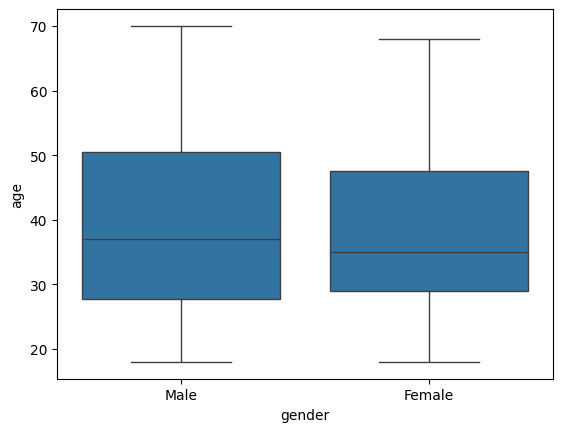

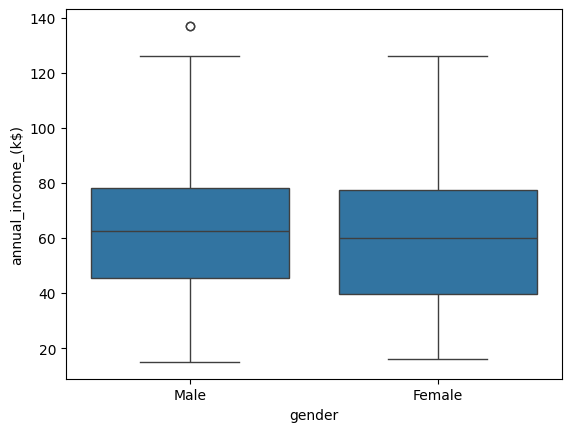

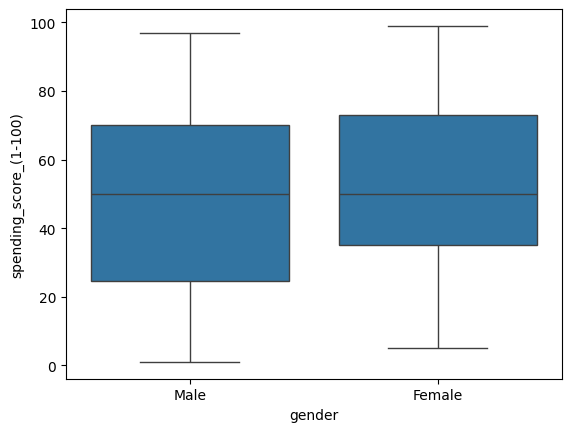

In [12]:
cols = ['age', 'annual_income_(k$)','spending_score_(1-100)']
for i in cols:
    sns.boxplot(data=data_cleaned,x='gender',y=data_cleaned[i])
    plt.show()

# Bivariate Analysis

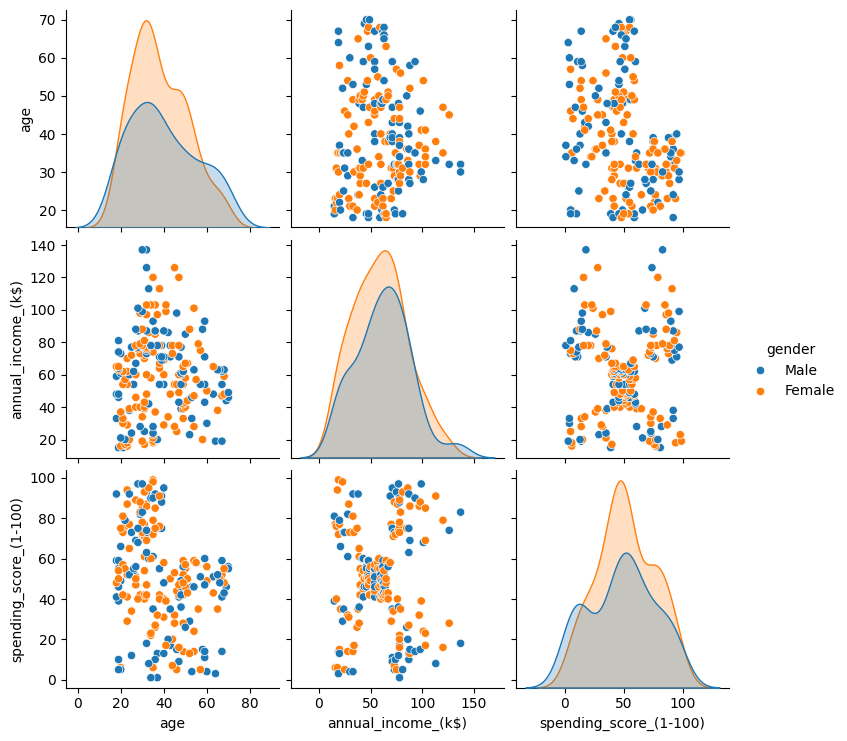

In [13]:
sns.pairplot(data_cleaned,hue='gender')

<Axes: xlabel='annual_income_(k$)', ylabel='spending_score_(1-100)'>

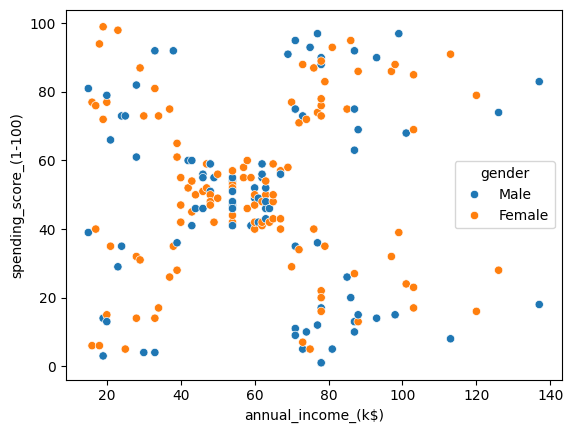

In [14]:
sns.scatterplot(data=data_cleaned, x='annual_income_(k$)',y='spending_score_(1-100)',hue='gender' )

In [15]:
data_drop_gender=data_cleaned.drop('gender',axis=1)
data_drop_gender_corr = data_drop_gender.corr()

<Axes: >

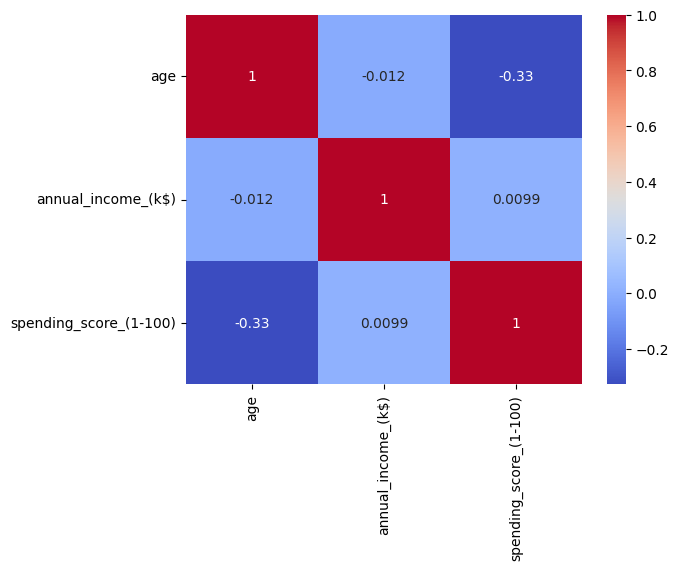

In [16]:
sns.heatmap(data_drop_gender_corr,annot=True,cmap='coolwarm')

# Clustering


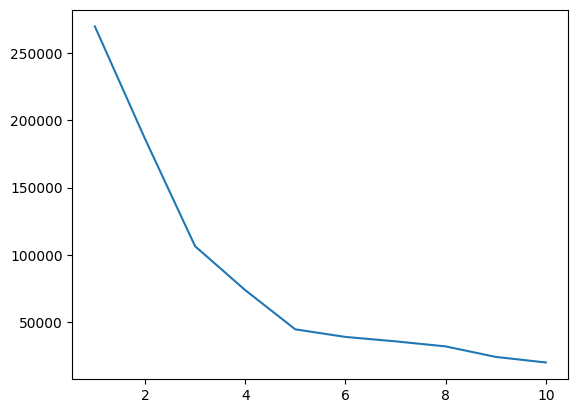

In [17]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(data_cleaned[['annual_income_(k$)','spending_score_(1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [18]:
clustering = KMeans(n_clusters=5)
clustering.fit(data_cleaned[['annual_income_(k$)','spending_score_(1-100)']])
data_cleaned['clusters'] =clustering.labels_
data_cleaned.head()

,gender,age,annual_income_(k$),spending_score_(1-100),clusters
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [19]:
centers =pd.DataFrame(clustering.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='annual_income_(k$)', ylabel='spending_score_(1-100)'>

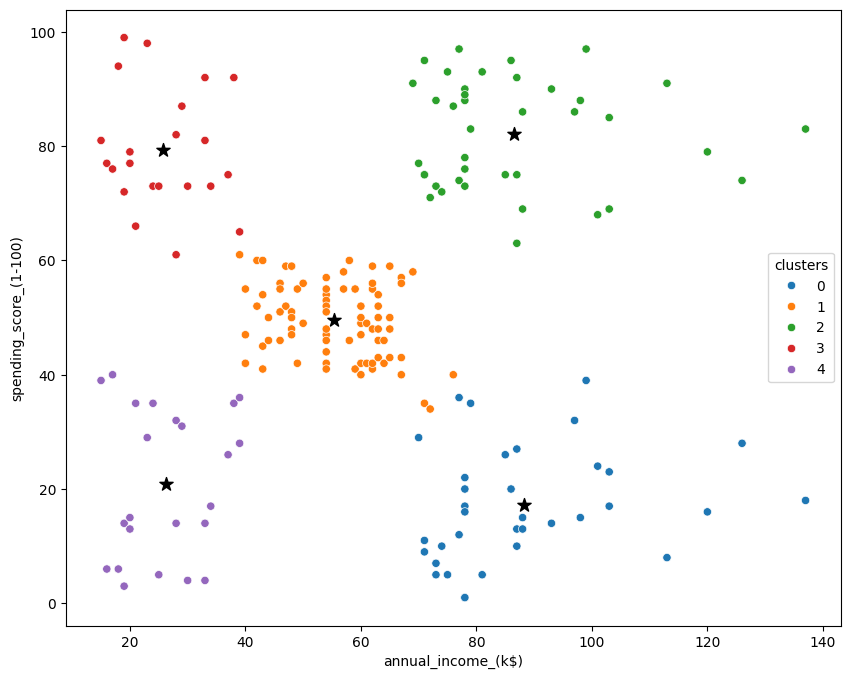

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=data_cleaned, x ='annual_income_(k$)',y='spending_score_(1-100)',hue='clusters',palette='tab10')


In [21]:
pd.crosstab(data_cleaned['clusters'],data_cleaned['gender'],normalize='index')

gender,Female,Male
clusters,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [22]:
data_cleaned.groupby('clusters')[['age', 'annual_income_(k$)',
       'spending_score_(1-100)']].mean()

,age,annual_income_(k$),spending_score_(1-100)
clusters,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043
